# Importing the Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [46]:
dataset = pd.read_csv('appdata10.csv')

# EDA

In [47]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [48]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


# Data Cleaning

In [49]:
dataset['hour'] = dataset.hour.str.slice(1,3).astype(int)

# Plotting

In [50]:
dataset2 = dataset.copy().drop(columns = ['user','screen_list',
                                         'enrolled_date','first_open','enrolled'])

In [51]:
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


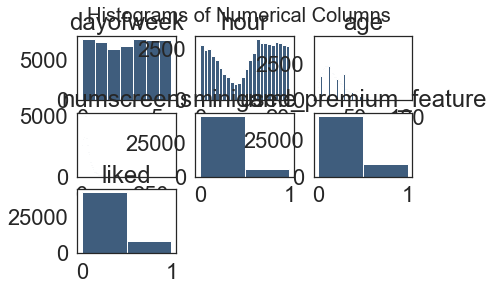

In [52]:
plt.suptitle('Histograms of Numerical Columns', fontsize = 20)
for i in range(1, dataset2.shape[1]+1):
    plt.subplot(3,3, i)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i-1])
    
    vals = np.size(dataset2.iloc[:, i - 1].unique())
    
    plt.hist(dataset2.iloc[:,i-1], bins = vals, color = '#3F5D7D')

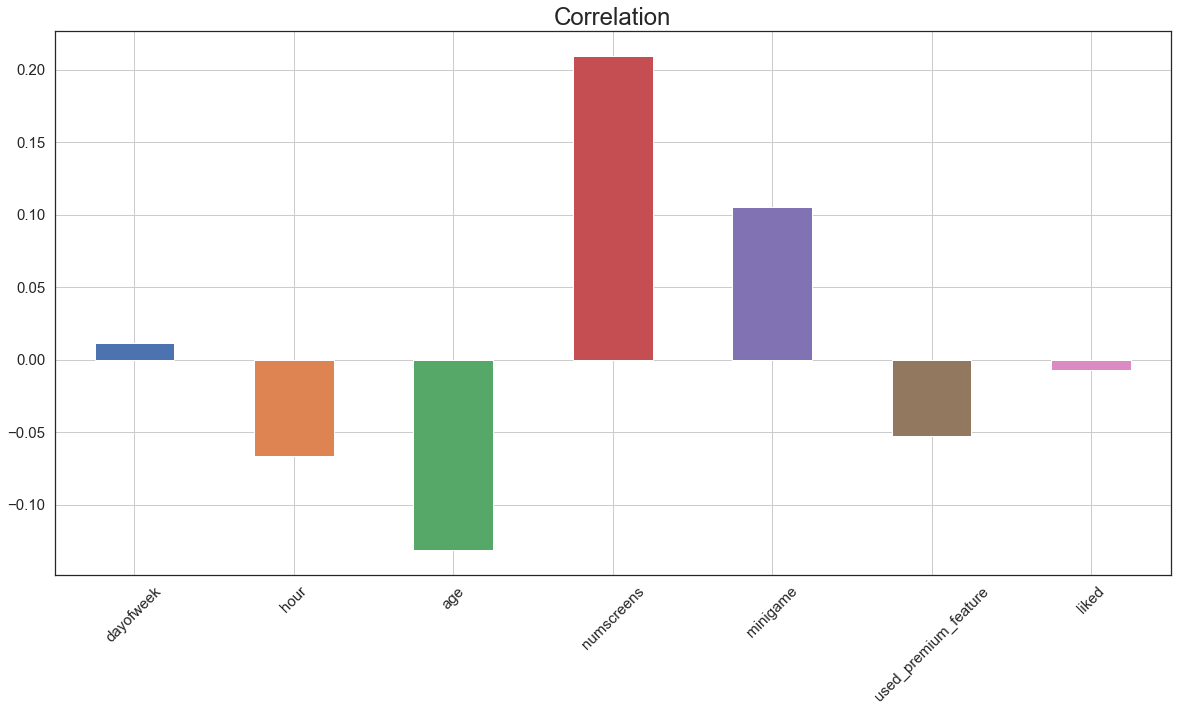

In [53]:
dataset2.corrwith(dataset.enrolled).plot.bar(figsize = (20,10),
                                            title = 'Correlation',
                                            fontsize = 15, rot = 45,
                                            grid = True)

In [2]:
#sns.set(style='white', font_scale = 2)

# Compute the correletion matrix
#corr = dataset2.corr()

# Generate a mask for the upper triangle
#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(18,15))
#f.suptitle('Correlation Matrix', fontsize=40)

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask an correct aspect ratio
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#         square=True,linewidths=.5,cbar_kws={'shrink:.5'})

# Feature Engineering

In [54]:
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [55]:
dataset['first_open'] = [parser.parse(row_data) for row_data in dataset['first_open']]

In [56]:
dataset['enrolled_date'] = [parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in dataset['enrolled_date']]

In [57]:
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [58]:
dataset['difference'] = (dataset.enrolled_date - dataset.first_open).astype('timedelta64[h]')

Text(0.5, 1.0, 'Distribution of Time-Since-Enrolled')

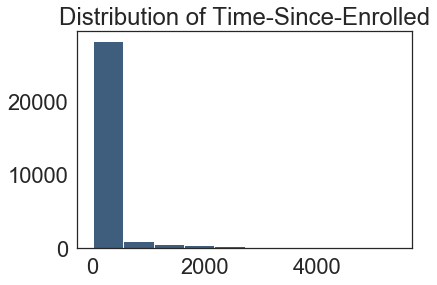

In [59]:
plt.hist(dataset['difference'].dropna(), color='#3F5D7D')
plt.title('Distribution of Time-Since-Enrolled')

In [60]:
dataset.loc[dataset.difference > 48, 'enrolled'] = 0

Text(0.5, 1.0, 'Distribution of Time-Since-Enrolled')

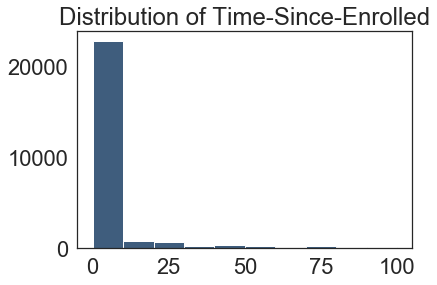

In [61]:
plt.hist(dataset['difference'].dropna(), color='#3F5D7D',
        range = [0,100])
plt.title('Distribution of Time-Since-Enrolled')

In [62]:
dataset = dataset.drop(columns = ['difference','enrolled_date','first_open'])

In [63]:
dataset.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


In [64]:
top_screens = pd.read_csv('top_screens.csv').top_screens.values

In [65]:
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [66]:
dataset['screen_list'] = dataset.screen_list.astype(str) + ','
for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset["screen_list"] = dataset.screen_list.str.replace(sc+",","")

In [67]:
dataset['other'] = dataset.screen_list.str.count(",")
dataset = dataset.drop(columns = ["screen_list"])

# Funnel
savings_screens = ["Saving1",
                 "Saving2",
                 "Saving2Amount",
                 "Saving4",
                 "Saving5",
                 "Saving6",
                 "Saving7",
                 "Saving8",
                 "Saving9",
                 "Saving10"]

dataset['SavingsCount'] = dataset[savings_screens].sum(axis=1)
dataset = dataset.drop(columns = savings_screens)

cm_screens = ['Credit1',
             'Credit2',
             'Credit3',
             'Credit3Container',
             'Credit3Dashboard']
dataset['CMCount'] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns=cm_screens)

cc_screens = ['CC1',
             'CC1Category',
             'CC3']
dataset['CCCount'] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)

loan_screens = ['Loan',
               'Loan2',
               'Loan3',
               'Loan4']
dataset['LoansCount'] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)

In [68]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingsCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [69]:
dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'other',
       'SavingsCount', 'CMCount', 'CCCount', 'LoansCount'],
      dtype='object')

In [70]:
# Saving the data to csv file
dataset.to_csv('new_appdata10.csv', index=False)

# Data Preprocessing

In [71]:
dataset = pd.read_csv('new_appdata10.csv')

In [72]:
response = dataset['enrolled']

In [73]:
dataset = dataset.drop(columns=['enrolled'])

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(dataset, response,
                                                   test_size=0.2,random_state=0)

In [76]:
train_identifier = X_train['user']

In [77]:
X_train = X_train.drop(columns=['user'])

In [78]:
test_identifier = X_test['user']

In [80]:
X_test = X_test.drop(columns=['user'])

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
sc_X = StandardScaler()

In [83]:
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))

C:\Users\harendra\Anaconda4\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\harendra\Anaconda4\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\harendra\Anaconda4\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [84]:
X_train2.columns = X_train.columns.values

In [86]:
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

In [87]:
X_train = X_train2
X_test = X_test2

# Model Building

In [90]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0,penalty='l1')

In [91]:
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [92]:
y_pred = classifier.predict(X_test)

In [93]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [94]:
cm = confusion_matrix(y_test,y_pred)

In [95]:
accuracy_score(y_test,y_pred)

0.7681

In [96]:
precision_score(y_test,y_pred)

0.7618952017667135

In [97]:
recall_score(y_test,y_pred)

0.7700892857142857

In [98]:
f1_score(y_test,y_pred)

0.7659703300030276

Test Data Accuracy: 0.7681


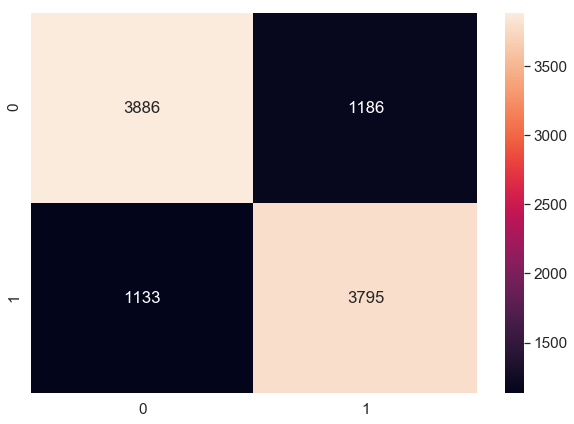

In [99]:
df_cm = pd.DataFrame(cm,index=(0,1),columns=(0,1))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm,annot=True,fmt='g')
print('Test Data Accuracy: %0.4f' % accuracy_score(y_test,y_pred))

In [100]:
from sklearn.model_selection import cross_val_score

In [101]:
accuracies = cross_val_score(estimator=classifier, X=X_train,y=y_train,
                            cv=10)

C:\Users\harendra\Anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\harendra\Anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\harendra\Anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\harendra\Anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\harendra\Anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

In [102]:
print('Logistic Accuracy: %0.3f (+/- %0.3f)' % (accuracies.mean(), accuracies.std()*2))

Logistic Accuracy: 0.767 (+/- 0.010)


In [103]:
# Formatting the Final Result
final_results = pd.concat([y_test,test_identifier],axis=1).dropna()
final_results['predicted_results'] = y_pred
final_results[['user','enrolled','predicted_results']].reset_index(drop=True)

,user,enrolled,predicted_results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
5,65042,1,0
6,207226,1,1
7,363062,0,0
8,152296,1,1
9,64484,0,0
